In [236]:
#import all libraries and classes
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

In [237]:
#import the dataset
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()

In [238]:
#select the features and target
X = breast_cancer.data
y = breast_cancer.target

In [239]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [240]:
#scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [241]:
#build the model
logreg1 = LogisticRegression()
logreg1.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [242]:
#check the performance
print("Train Accuracy: \t{:.4f}".format(logreg1.score(X_train_scaled, y_train)))
print("Test Accuracy: \t\t{:.4f}".format(logreg1.score(X_test_scaled, y_test)))

Train Accuracy: 	0.9742
Test Accuracy: 		0.9580


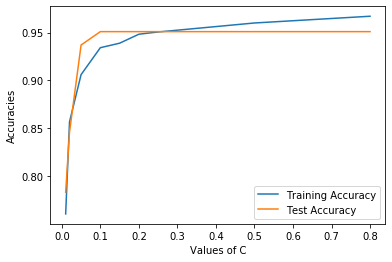

In [243]:
#hyper-parameter tuning and get the best value of regularization constant c in order to avoid overfitting
values_of_C = [0.01, 0.02, 0.05, 0.1, 0.15, 0.2, 0.25, 0.5, 0.6, 0.8]

train_accuracy = []
test_accuracy = []

for c in values_of_C:
    logreg = LogisticRegression(C = c)
    logreg.fit(X_train_scaled, y_train)
    train_accuracy.append(logreg.score(X_train_scaled, y_train))
    test_accuracy.append(logreg.score(X_test_scaled, y_test))

plt.plot(values_of_C, train_accuracy, label = "Training Accuracy")
plt.plot(values_of_C, test_accuracy, label = "Test Accuracy")
plt.legend()
plt.xlabel("Values of C")
plt.ylabel("Accuracies")
plt.show()

In [244]:
#rebuild the model
logreg2 = LogisticRegression(C=0.25)
logreg2.fit(X_train_scaled, y_train)

LogisticRegression(C=0.25, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [245]:
#check the performance of the new model
print("Modified Train Accuracy: \t{:.4f}".format(logreg2.score(X_train_scaled, y_train)))
print("Modified Test Accuracy: \t{:.4f}".format(logreg2.score(X_test_scaled, y_test)))

Modified Train Accuracy: 	0.9507
Modified Test Accuracy: 	0.9510
